In [19]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CombinedBettingData3.csv')
df.head()

,Unnamed: 0,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps
0,0,SAC,UTA,11.0,40.0,0.216,29.0,22.0,0.569,2009-02-06,-4,-2,Pinnacle Sports,-3,Sportsbetting,-2.875,8
1,1,POR,UTA,29.0,17.0,0.630,26.0,22.0,0.542,2009-01-31,14,9,5Dimes,9,5Dimes,9.000,8
2,2,MEM,UTA,11.0,28.0,0.282,24.0,16.0,0.600,2009-01-16,-10,-4,5Dimes,-4,5Dimes,-4.000,8
3,3,UTA,IND,23.0,15.0,0.605,13.0,25.0,0.342,2009-01-12,7,10,Bovada,9,Sportsbetting,9.250,8
4,4,HOU,UTA,20.0,11.0,0.645,18.0,14.0,0.563,2008-12-27,5,9,5Dimes,9,5Dimes,9.000,8


In [20]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df.columns

Index(['HomeTeam', 'AwayTeam', 'HTWin', 'HTLoss', 'HT%', 'ATWin', 'ATLoss',
       'AT%', 'Date', 'WinMargin', 'TopLine', 'TLCompany', 'BotLine',
       'BLCompany', 'Average', 'NumComps'],
      dtype='object')

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Weekday'] = df['Date'].dt.dayofweek
df = df.sort_values(by=['Date'])
df = df.reset_index()
df = df.drop(['index', 'Date'], axis=1)
df.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,WinMargin,TopLine,TLCompany,BotLine,BLCompany,Average,NumComps,Year,Month,Week,Weekday
0,MIN,SAC,1.0,0.0,1.0,0.0,1.0,0.0,9,5,Pinnacle Sports,4,Bookmaker,4.75,4,2006,11,44,2
1,NJN,TOR,1.0,0.0,1.0,0.0,1.0,0.0,10,7,Bookmaker,7,Bookmaker,7.00,4,2006,11,44,2
2,MEM,NYK,0.0,1.0,0.0,1.0,0.0,1.0,-1,5,Bovada,4,5Dimes,4.75,4,2006,11,44,2
3,ORL,CHI,1.0,0.0,1.0,1.0,1.0,0.5,15,-1,Bookmaker,-2,Bovada,-1.25,4,2006,11,44,2
4,CLE,WAS,1.0,0.0,1.0,0.0,1.0,0.0,3,6,Bovada,6,Bovada,6.00,4,2006,11,44,2


In [22]:
df['average'] = df['Average']
df = df.drop(['Average'], axis=1)
cols_at_end = ['WinMargin']
df = df[[c for c in df if c not in cols_at_end] + [c for c in cols_at_end if c in df]]

In [23]:
team = df.HomeTeam.unique()
team_dict = dict(zip(team, range(len(team))))
df1 = df.copy(deep=True)
df1 = df1.replace({'HomeTeam': team_dict})
df1 = df1.replace({'AwayTeam': team_dict})
df1.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,WinMargin
0,0,27,1.0,0.0,1.0,0.0,1.0,0.0,5,Pinnacle Sports,4,Bookmaker,4,2006,11,44,2,4.75,9
1,1,14,1.0,0.0,1.0,0.0,1.0,0.0,7,Bookmaker,7,Bookmaker,4,2006,11,44,2,7.00,10
2,2,23,0.0,1.0,0.0,1.0,0.0,1.0,5,Bovada,4,5Dimes,4,2006,11,44,2,4.75,-1
3,3,17,1.0,0.0,1.0,1.0,1.0,0.5,-1,Bookmaker,-2,Bovada,4,2006,11,44,2,-1.25,15
4,4,21,1.0,0.0,1.0,0.0,1.0,0.0,6,Bovada,6,Bovada,4,2006,11,44,2,6.00,3


In [24]:
better = df1.TLCompany.unique()
bet_dict = dict(zip(better, range(len(better))))
df1 = df1.replace({'TLCompany': bet_dict})
df1 = df1.replace({'BLCompany': bet_dict})
df1.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,WinMargin
0,0,27,1.0,0.0,1.0,0.0,1.0,0.0,5,0,4,1,4,2006,11,44,2,4.75,9
1,1,14,1.0,0.0,1.0,0.0,1.0,0.0,7,1,7,1,4,2006,11,44,2,7.00,10
2,2,23,0.0,1.0,0.0,1.0,0.0,1.0,5,2,4,3,4,2006,11,44,2,4.75,-1
3,3,17,1.0,0.0,1.0,1.0,1.0,0.5,-1,1,-2,2,4,2006,11,44,2,-1.25,15
4,4,21,1.0,0.0,1.0,0.0,1.0,0.0,6,2,6,2,4,2006,11,44,2,6.00,3


In [25]:
print (len(df1))
df1['BLCompany'] = pd.to_numeric(df1['BLCompany'], errors='coerce')
df1 = df1.dropna()
print (len(df1))

14903
14903


In [27]:
df1.loc[df1['WinMargin'] > df1['average'], 'Over'] = 1
df1.loc[df1['WinMargin'] <= df1['average'], 'Over'] = 0

In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df1.columns
sc2 = StandardScaler()
df1 = df1.dropna()
df2 = df1.copy(deep=True)
for col in cols:
    df2[[col]] = sc2.fit_transform(df2[[col]])
df2.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,WinMargin,Over
0,-1.699521,1.340681,-1.335027,-1.387301,2.557356,-1.403276,-1.325606,-2.597792,0.270543,-1.330707,0.206064,-0.887523,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.277485,0.449801,1.026865
1,-1.586928,-0.120367,-1.335027,-1.387301,2.557356,-1.403276,-1.325606,-2.597792,0.593534,-0.859111,0.683119,-0.887523,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.641308,0.524906,1.026865
2,-1.474335,0.891128,-1.405992,-1.316407,-2.655930,-1.332133,-1.396592,2.613443,0.270543,-0.387516,0.206064,0.075508,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.277485,-0.301253,-0.973837
3,-1.361743,0.216798,-1.335027,-1.387301,2.557356,-1.332133,-1.325606,0.007826,-0.698431,-0.859111,-0.748048,-0.406007,-2.816081,-1.793418,1.266295,1.155167,-0.522349,-0.692711,0.900433,1.026865
4,-1.249150,0.666351,-1.335027,-1.387301,2.557356,-1.403276,-1.325606,-2.597792,0.432038,-0.387516,0.524101,-0.406007,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.479609,-0.000832,-0.973837


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


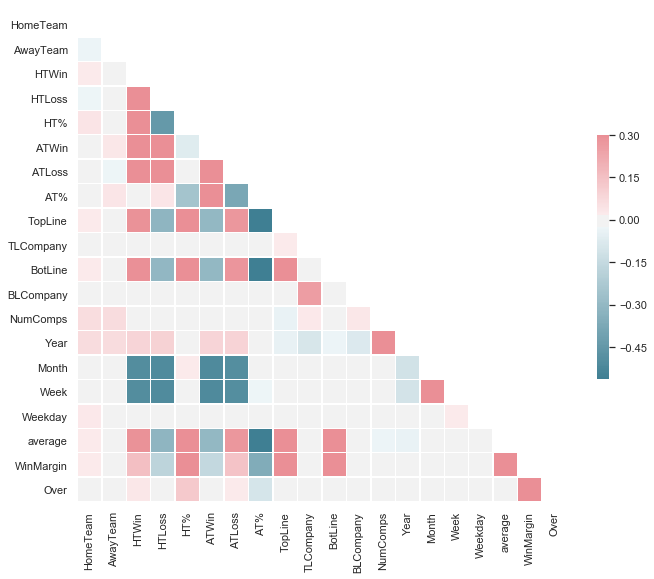

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D 

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

## Data Clustering

In [30]:
def plot_embedding(X, y, title=None, num=10):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure(figsize=(18, 9))
    plt.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/num))
    
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

In [31]:
def plot_embedding3d(X, y, title=None):
    x_min = np.min(X, 0)
    x_max = np.max(X, 0)
    X = (X-x_min)/(x_max-x_min)
    
    plt.figure()
    
    ax = Axes3D(plt.figure(), rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(X[:,0], X[:,1], color=plt.cm.Set1(y/10.))
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    if title is not None:
        plt.title(title)
    plt.show()

In [32]:
df2 = df2.drop(['WinMargin','Over'], axis=1)
df2.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average
0,-1.699521,1.340681,-1.335027,-1.387301,2.557356,-1.403276,-1.325606,-2.597792,0.270543,-1.330707,0.206064,-0.887523,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.277485
1,-1.586928,-0.120367,-1.335027,-1.387301,2.557356,-1.403276,-1.325606,-2.597792,0.593534,-0.859111,0.683119,-0.887523,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.641308
2,-1.474335,0.891128,-1.405992,-1.316407,-2.655930,-1.332133,-1.396592,2.613443,0.270543,-0.387516,0.206064,0.075508,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.277485
3,-1.361743,0.216798,-1.335027,-1.387301,2.557356,-1.332133,-1.325606,0.007826,-0.698431,-0.859111,-0.748048,-0.406007,-2.816081,-1.793418,1.266295,1.155167,-0.522349,-0.692711
4,-1.249150,0.666351,-1.335027,-1.387301,2.557356,-1.403276,-1.325606,-2.597792,0.432038,-0.387516,0.524101,-0.406007,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.479609


In [33]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#subSpace = TSNE().fit_transform(df2.values)
subSpace = PCA().fit_transform(df2.values)

### K-Means

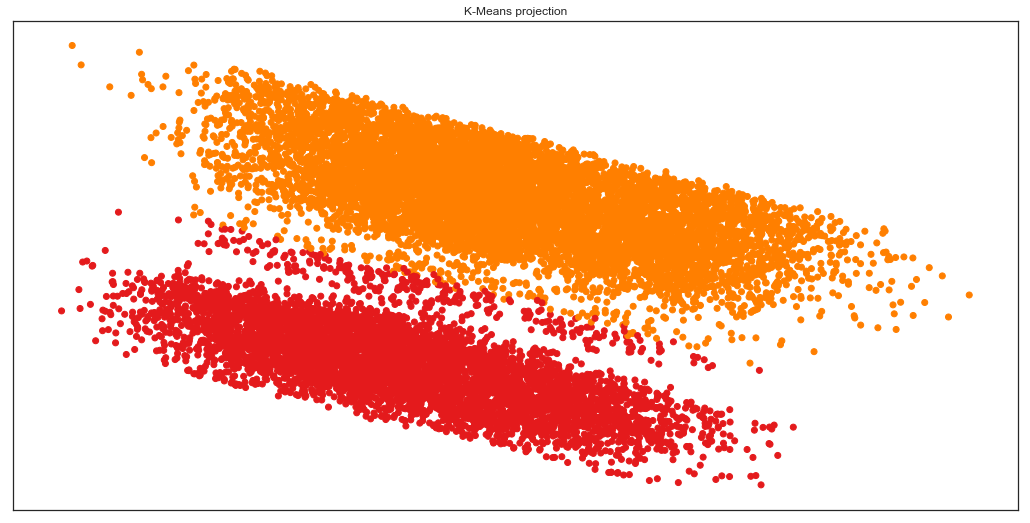

In [34]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=2, max_iter= 10000, n_init=100).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'K-Means projection',2)

In [35]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,label
0,-1.699521,1.340681,-1.335027,-1.387301,2.557356,-1.403276,-1.325606,-2.597792,0.270543,-1.330707,0.206064,-0.887523,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.277485,0
1,-1.586928,-0.120367,-1.335027,-1.387301,2.557356,-1.403276,-1.325606,-2.597792,0.593534,-0.859111,0.683119,-0.887523,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.641308,0
2,-1.474335,0.891128,-1.405992,-1.316407,-2.655930,-1.332133,-1.396592,2.613443,0.270543,-0.387516,0.206064,0.075508,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.277485,0
3,-1.361743,0.216798,-1.335027,-1.387301,2.557356,-1.332133,-1.325606,0.007826,-0.698431,-0.859111,-0.748048,-0.406007,-2.816081,-1.793418,1.266295,1.155167,-0.522349,-0.692711,0
4,-1.249150,0.666351,-1.335027,-1.387301,2.557356,-1.403276,-1.325606,-2.597792,0.432038,-0.387516,0.524101,-0.406007,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.479609,0


In [36]:
from sklearn.metrics import accuracy_score
accuracy =  accuracy_score(df4['label'].values, df1['Over'].values) * 100
print('The cluster accuracy is ' + str(accuracy))

The cluster accuracy is 50.14426625511642


### Agglomerative Clustering

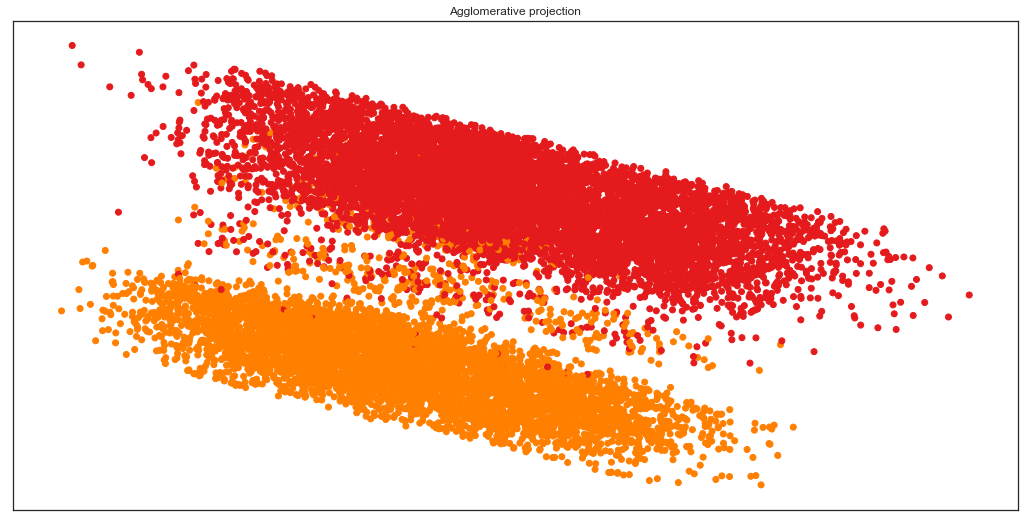

In [37]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2).fit(df2.values)
plot_embedding(subSpace, cluster.labels_, 'Agglomerative projection',2)

In [38]:
df4 = df2.copy(deep=True)
df4['label'] = cluster.labels_ 
df4.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,TopLine,TLCompany,BotLine,BLCompany,NumComps,Year,Month,Week,Weekday,average,label
0,-1.699521,1.340681,-1.335027,-1.387301,2.557356,-1.403276,-1.325606,-2.597792,0.270543,-1.330707,0.206064,-0.887523,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.277485,1
1,-1.586928,-0.120367,-1.335027,-1.387301,2.557356,-1.403276,-1.325606,-2.597792,0.593534,-0.859111,0.683119,-0.887523,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.641308,1
2,-1.474335,0.891128,-1.405992,-1.316407,-2.655930,-1.332133,-1.396592,2.613443,0.270543,-0.387516,0.206064,0.075508,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.277485,1
3,-1.361743,0.216798,-1.335027,-1.387301,2.557356,-1.332133,-1.325606,0.007826,-0.698431,-0.859111,-0.748048,-0.406007,-2.816081,-1.793418,1.266295,1.155167,-0.522349,-0.692711,1
4,-1.249150,0.666351,-1.335027,-1.387301,2.557356,-1.403276,-1.325606,-2.597792,0.432038,-0.387516,0.524101,-0.406007,-2.816081,-1.793418,1.266295,1.155167,-0.522349,0.479609,1


In [39]:
from sklearn.metrics import accuracy_score
accuracy =  accuracy_score(df4['label'].values, df1['Over'].values) * 100
print('The cluster accuracy is ' + str(accuracy))

The cluster accuracy is 49.66785211031336
